In [60]:
import numpy as np
import pandas as pd
from numpy import arange
from numpy import set_printoptions
from pandas import read_csv
from pandas import set_option
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [61]:
col_nam = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/content/housing (task4).csv', header=None, delimiter=r"\s+", names=col_nam)
data.dropna()
print(data)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


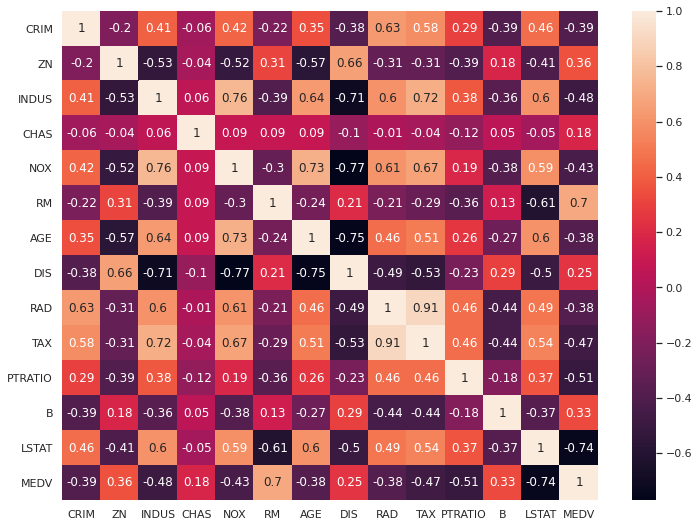

In [62]:
# with this i hope to gain insights  with this  heat map
correlation_matrix = data.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix,annot=True)

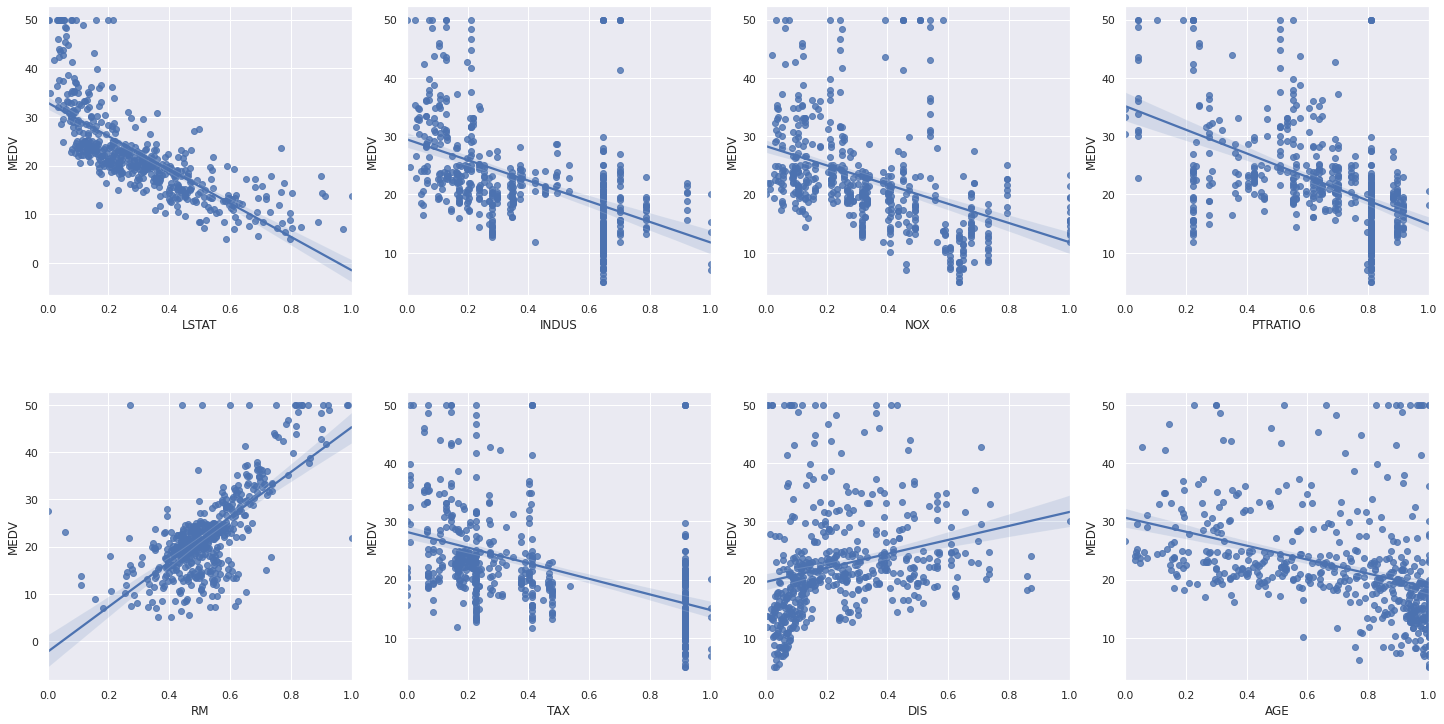

In [63]:
# with this i hope to gain insights similar to the heat map using this reg plot
from sklearn import preprocessing

# Let's scale the columns before plotting them against MEDV as it is the target variable
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = pyplot.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, j in enumerate(column_sels):
    sns.regplot(y=y, x=x[j], ax=axs[i])
pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [64]:
data.drop('CHAS',axis=1, inplace=True)
data.drop('ZN',axis=1, inplace=True)
data.drop('RAD',axis=1, inplace=True)
print(data)
data.describe()# to better comprehend the dataset/ THESE REALLY HELPED WITH THE PREDICTIONS AS APPARENT IN THE CELLS BELOW.

        CRIM  INDUS    NOX     RM   AGE  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632   2.31  0.538  6.575  65.2  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   7.07  0.469  6.421  78.9  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   7.07  0.469  7.185  61.1  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   2.18  0.458  6.998  45.8  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   2.18  0.458  7.147  54.2  ...  222.0     18.7  396.90   5.33  36.2
..       ...    ...    ...    ...   ...  ...    ...      ...     ...    ...   ...
501  0.06263  11.93  0.573  6.593  69.1  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527  11.93  0.573  6.120  76.7  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076  11.93  0.573  6.976  91.0  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959  11.93  0.573  6.794  89.3  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741  11.93  0.573  6.030  80.8  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 11 

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
for k, v in data.items():  
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1# checking in with the inter-quantile range
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))# to look for noise/outliers.

Column CRIM outliers = 13.04%
Column INDUS outliers = 0.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [66]:
arr= data.values
X=arr[:,0:11]
Y=arr[:,10]
scaler=MinMaxScaler(feature_range=(0,1))
rX=scaler.fit_transform(X)
set_printoptions(precision=3)
print(rX[0:1,:])

[[0.    0.068 0.315 0.578 0.642 0.269 0.208 0.287 1.    0.09  0.422]]


In [67]:
validation_size =0.20#i have tried this with 90/10 split but it didn't help much it seems that more than 80/20 split just leads to OVERFITTING.
seed=7
X_Train,X_validation,Y_Train,Y_validation=train_test_split(rX,Y,test_size=validation_size,random_state=seed)

In [68]:
num_folds=3
seed=1
scoring ='r2'
# to select the model that is best fit for our data we try out a few
models=[]# list to store the models
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))# support vector machines
results=[]# to store the results of each model
names=[]
for name,model in models:
  Kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results=cross_val_score(model,X_Train,Y_Train,cv=Kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  m="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
  print(m)# it's clear from the r2 scores that linear regression is bestsuited for our predictions , also with 0 deviation . 
  #CART also seems to be doing pretty good on the data set


LR: 1.000000 (0.000000)
LASSO: 0.714555 (0.044096)
EN: 0.226710 (0.027978)
KNN: 0.874545 (0.013989)
CART: 0.997533 (0.001376)
SVM: 0.832576 (0.008802)


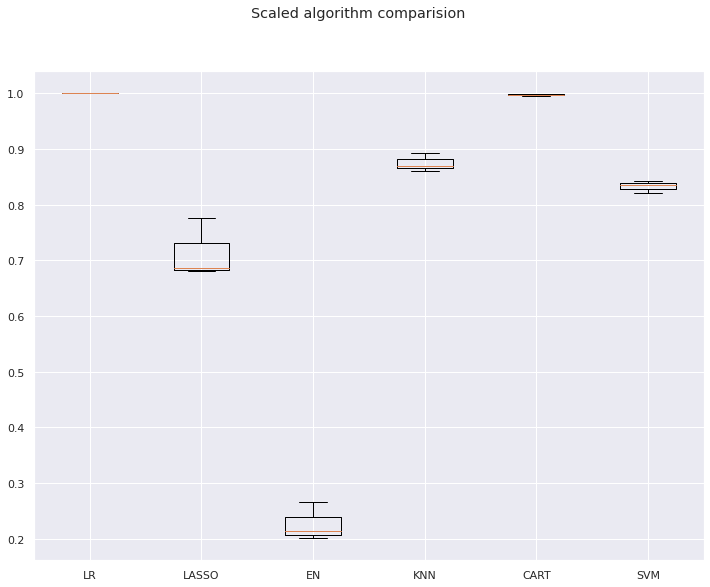

In [69]:
# comparing the algorithms
fig=pyplot.figure()
fig.suptitle('Scaled algorithm comparision')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
#therefore LR is the best to work with atleast for the current orientation of the dataset.

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression(fit_intercept=True)
model.fit(X_Train,Y_Train)
#FROM THIS AND THE CELL its clear that LR is better for this 
predictions =model.predict(X_validation)
print(r2_score(Y_validation,predictions))
print(predictions)
print(Y_validation)

1.0
[21.7 18.5 22.2 20.4  8.8  8.3 21.4 23.6 23.5 19.  10.2 31.6 18.4 19.4
 44.  23.2 22.  33.1 13.2 21.7 16.7 23.9 42.3 18.5 14.6  7.5 33.4 22.
 28.1 24.8 19.9 24.8 28.7 14.1 43.5 20.4 18.3 13.4 21.  22.  22.6 13.9
 13.3 26.5 20.   9.5 21.6 22.6 15.6 23.1 27.1 25.2 15.  21.9  9.6 22.7
 18.3 21.4 20.5 21.1 24.5 31.  18.7 18.7 22.7 50.  16.7 23.  20.4 22.8
 24.8 10.5 18.2 31.5 23.8 19.6 12.7 15.2 31.2 14.5 17.8 25.  23.  50.
 23.7 25.1 24.7 16.8 34.7 23.3 50.  46.7 43.1 24.4 24.1  6.3 26.4 16.3
 17.2 28.  15.2 16.6]
[21.7 18.5 22.2 20.4  8.8  8.3 21.4 23.6 23.5 19.  10.2 31.6 18.4 19.4
 44.  23.2 22.  33.1 13.2 21.7 16.7 23.9 42.3 18.5 14.6  7.5 33.4 22.
 28.1 24.8 19.9 24.8 28.7 14.1 43.5 20.4 18.3 13.4 21.  22.  22.6 13.9
 13.3 26.5 20.   9.5 21.6 22.6 15.6 23.1 27.1 25.2 15.  21.9  9.6 22.7
 18.3 21.4 20.5 21.1 24.5 31.  18.7 18.7 22.7 50.  16.7 23.  20.4 22.8
 24.8 10.5 18.2 31.5 23.8 19.6 12.7 15.2 31.2 14.5 17.8 25.  23.  50.
 23.7 25.1 24.7 16.8 34.7 23.3 50.  46.7 43.1 24.4 24.1

In [71]:
scaler=StandardScaler().fit(X_Train)
rescaledX=scaler.transform(X_Train)
model=GradientBoostingRegressor(random_state=seed,n_estimators=100)
model.fit(rescaledX,Y_Train)
#transforming the validation dataset
rescaledvalidationX= scaler.transform(X_validation)
predictions=model.predict(rescaledvalidationX)
print(r2_score(Y_validation,predictions))
print(predictions)
print(Y_validation)

0.9997303741252256
[21.655 18.552 22.099 20.56   8.714  8.29  21.244 23.642 23.344 18.983
 10.103 31.612 18.425 19.407 43.778 23.201 21.994 33.062 13.081 21.73
 16.574 23.881 42.789 18.561 14.513  7.398 33.363 21.998 28.166 24.847
 19.852 24.858 28.699 14.078 43.802 20.545 18.181 13.386 20.999 22.023
 22.604 13.888 13.447 26.542 19.859  9.663 21.692 22.605 15.643 23.108
 26.911 25.309 14.902 21.972  9.659 22.756 18.133 21.28  20.541 21.183
 24.503 31.124 18.816 18.832 22.766 49.988 16.55  22.851 20.56  22.809
 24.864 10.584 18.184 31.608 23.765 19.614 12.735 15.23  31.101 14.544
 17.878 24.988 22.875 49.968 23.707 24.999 24.636 16.537 34.593 23.3
 49.985 45.937 42.792 24.369 24.133  5.683 26.555 16.05  17.152 28.053
 15.194 16.602]
[21.7 18.5 22.2 20.4  8.8  8.3 21.4 23.6 23.5 19.  10.2 31.6 18.4 19.4
 44.  23.2 22.  33.1 13.2 21.7 16.7 23.9 42.3 18.5 14.6  7.5 33.4 22.
 28.1 24.8 19.9 24.8 28.7 14.1 43.5 20.4 18.3 13.4 21.  22.  22.6 13.9
 13.3 26.5 20.   9.5 21.6 22.6 15.6 23.1 27.1 

In [72]:
# I HAVE HERE TRIED TO calc the mse error here along with the make_pipeline method to get better organozation.
from sklearn import datasets, linear_model
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}#dictionary to store scores
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -34.94 (+/- 44.59)
MSE: -32.56 (+/- 38.72)
MSE: -21.33 (+/- 25.77)
